In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from scipy.io import wavfile

In [2]:
# importing wav file
myAudio = "/home/jeremy/Desktop/asymmetric-sampling-master/data/fig6/Pa.wav"
samplingFreq, pa = wavfile.read(myAudio)
pa = pa[:,0]
timeArray = np.arange(0, float(pa.shape[0]), 1) / samplingFreq * 1000

myAudio2 = "/home/jeremy/Desktop/asymmetric-sampling-master/data/fig6/Ba.wav"
samplingFreq, ba = wavfile.read(myAudio2)
ba = ba[:,0]
timeArray1 = np.arange(0,float(ba.shape[0]), 1) / samplingFreq * 1000 

/home/jeremy/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
# import ITPC spectrum in response to syllables
itpcpa = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig6/itc_syllable_pa_by_roi.npz")
itpcba = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig6/itc_syllable_ba_by_roi.npz")

mean_area1 = itpcpa['pa_pac_l']
mean_area2 = itpcpa['pa_pac_r']
mean_area3 = itpcpa['pa_sac_l']
mean_area4 = itpcpa['pa_sac_r']
mean_area5 = itpcpa['pa_aac_l']
mean_area6 = itpcpa['pa_aac_r']

mean_area11 = itpcba['ba_pac_l']
mean_area22 = itpcba['ba_pac_r']
mean_area33 = itpcba['ba_sac_l']
mean_area44 = itpcba['ba_sac_r']
mean_area55 = itpcba['ba_aac_l']
mean_area66 = itpcba['ba_aac_r']

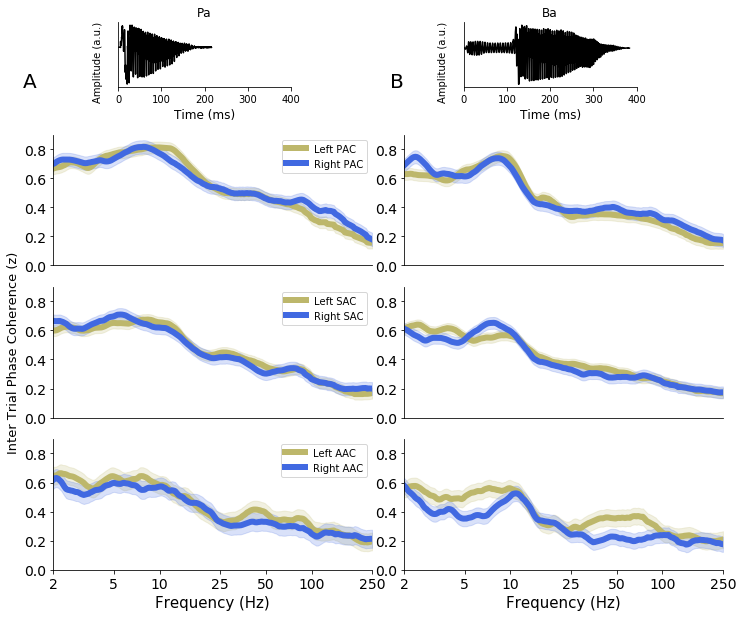

In [4]:
# plotting ITPC spectrums in response to syllables Ba vs Pa
freqs = np.logspace(*np.log10([2, 250]), num = 200)
areas = [mean_area1,mean_area2,mean_area11, mean_area22,mean_area3,mean_area4,mean_area33,mean_area44,mean_area5,mean_area6,mean_area55,mean_area66 ]
colors = ['darkkhaki','royalblue']
idx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
names = ['Left PAC','Right PAC','Left PAC','Right PAC','Left SAC','Right SAC','Left SAC','Right SAC','Left AAC','Right AAC','Left AAC','Right AAC']
widths = [0.5,0.5]
heights = [0.25,1,1,1]


fig6 = plt.figure(figsize = (12,9))
gs2 = gridspec.GridSpec(4, 2,width_ratios = widths,height_ratios = heights)
gs2.update(wspace = 0.1, hspace = 0.2)

titles = ['Pa', 'Ba']
axs_dims = [[0.2, 0.87, 0.2, 0.1],[0.6, 0.87, 0.2, 0.1]]
sounds = [pa,ba]
times = [timeArray,timeArray1]
a = -1

for i in range(8):
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs2[i],hspace = 0.0)
    ax = fig6.add_subplot(gss[0])
    
    if i < 2 :
        plt.axis('off')
        cax = fig6.add_axes(axs_dims[i])
        cax.plot(times[i],sounds[i], color = 'k')
        cax.set_xlabel('Time (ms)', fontsize = 12)
        cax.set_ylabel('Amplitude (a.u.)')
        cax.yaxis.set_label_coords(-0.09,0.4)
        cax.spines['top'].set_visible(False)
        cax.spines['right'].set_visible(False)
        cax.set_title(titles[i],fontsize = 12)
        cax.set_xlim(0,400)
        cax.set_yticks([])
    else : 
        
        a += 1
        itc = [areas[idx[a][0]],areas[idx[a][1]]]
        name = [names[idx[a][0]],names[idx[a][1]]]
        for line in range(2): 
            ax.plot(freqs,itc[line].mean(axis = 0), linewidth = 6,label = name[line],color = colors[line])
            ax.fill_between(freqs,itc[line].mean(axis = 0) - itc[line].std() / np.sqrt(len(itc[line])),itc[line].mean(axis = 0) + itc[line].std() / np.sqrt(len(itc[line])), alpha = 0.2, edgecolor = colors[line], facecolor = colors[line]) 
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.xscale("log")
        plt.xlim(2,250)
        plt.ylim(0,0.9)
        plt.yticks(fontsize = 14)
        ax.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
    if i == 4 :
        ax.set_ylabel('Inter Trial Phase Coherence (z)',fontsize = 13)
    if i in (2,4,6):
        ax.legend()
    if i in (6,7):
        plt.gca().axes.get_xaxis().set_visible(True)
        ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        ax.xaxis.set_minor_locator(ticker.NullLocator())
        tick_vals = np.array([2,5,10,25,50,100,250]).astype(int)
        ax.set_xticks(tick_vals)
        ax.tick_params(labelsize = 14)
        plt.xticks(fontsize = 14)
        ax.set_xlabel('Frequency (Hz)', fontsize = 15)

fig6.text(0.09,0.87,'A',fontsize=20)
fig6.text(0.515,0.87,'B',fontsize=20);